# Ecommerce Business Analysis using SQL and Python

In today's digital age, e-commerce has revolutionized the way businesses operate and consumers shop. To gain valuable insights into customer behavior, sales trends, and operational efficiency, businesses are increasingly turning to data analysis. This project aims to leverage SQL and Python to analyze a comprehensive e-commerce dataset, uncovering key trends, identifying areas for improvement, and supporting data-driven decision-making.

By utilizing SQL for data extraction and manipulation and Python for advanced analytics and visualization, this project will delve into various aspects of the e-commerce business

In [1]:
import pandas as pd
import mysql.connector
import os

In [ ]:
# List of CSV files and their corresponding table names
csv_files = [
    ('customers.csv', 'customers'),
    ('geolocation.csv', 'geolocation'),
    ('order_items.csv', 'order_items'),
    ('orders.csv', 'orders'),
    ('payments.csv', 'payments'),
    ('products.csv', 'products'),
    ('sellers.csv', 'sellers') 
]

# Connect to the MySQL database
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='root',
    database='ecommerce'
)
cursor = conn.cursor()

# Folder containing the CSV files
folder_path = 'E:/Python Data Analysis Projects/Ecommerce Analysis(Python+SQL)'

def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'TEXT'

for csv_file, table_name in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    
    # Replace NaN with None to handle SQL NULL
    df = df.where(pd.notnull(df), None)
    
    # Debugging: Check for NaN values
    print(f"Processing {csv_file}")
    print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

    # Clean column names
    df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

    # Generate the CREATE TABLE statement with appropriate data types
    columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
    create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
    cursor.execute(create_table_query)

    # Insert DataFrame data into the MySQL table
    for _, row in df.iterrows():
        # Convert row to tuple and handle NaN/None explicitly
        values = tuple(None if pd.isna(x) else x for x in row)
        sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
        cursor.execute(sql, values)

    # Commit the transaction for the current CSV file
    conn.commit()

# Close the connection
conn.close()

In [2]:
# Connecting to MYSQL database
db = mysql.connector.connect(host='localhost',
                             username = 'root',
                             password='root',
                             database='ecommerce')
cur = db.cursor()

In [3]:
# List all the unique cities where customers are located
query = """SELECT DISTINCT customer_city FROM customers"""
cur.execute(query) # to execute our query
data = cur.fetchall() # to fetch the data into python
data

[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

In [6]:
# Count the numbers of orders placed in 2017
query = """SELECT COUNT(order_id) FROM orders 
            WHERE YEAR(order_purchase_timestamp)=2017"""
cur.execute(query)
data = cur.fetchall()
print(f"total orders placed in 2017 are {data[0][0]}")

total orders placed in 2017 are 90202


In [7]:
pd.options.display.float_format = '{:.0f}'.format

In [8]:
# Find the total sales per category
query = """SELECT products.product_category, SUM(payments.payment_value)
FROM products JOIN order_items ON products.product_id=order_items.product_id
JOIN payments ON order_items.order_id = payments.order_id
GROUP BY products.product_category"""
cur.execute(query)
data = cur.fetchall()
data = pd.DataFrame(data, columns=['category','sales']) # convert to dataframe
data

,category,sales
0,perfumery,4053909
1,Furniture Decoration,11441411
2,telephony,3895056
3,Fashion Bags and Accessories,1745266
4,bed table bath,13700429
...,...,...
69,cds music dvds,9595
70,La Cuisine,23308
71,Fashion Children's Clothing,6285
72,PC Gamer,17395


In [9]:
# Percentage of orders that were paid in installments
query = """SELECT ( SUM(CASE WHEN payment_installments >=1 THEN 1
ELSE 0 END)/COUNT(order_id) )*100 FROM payments """
cur.execute(query)
data = cur.fetchall()
data

[(Decimal('99.9981'),)]

observation: 99.99% i.e, almost all the orders are paid in instalments

In [17]:
# Count the number of customers from each state
import plotly.express as px

query = """SELECT customer_state, COUNT(customer_unique_id) FROM customers
GROUP BY customer_state """
cur.execute(query)
data = cur.fetchall()
data = pd.DataFrame(data, columns=['customer state','no. of customers'])
data = data.sort_values(by="no. of customers", ascending=False) # changing order to descending

# Bar plot
fig = px.bar(data, x='customer state', y='no. of customers', title='Number of Customers by State')
fig.update_layout(plot_bgcolor='black', paper_bgcolor='black',title_font=dict(color='white'))
fig.update_xaxes(tickfont = {'color':'white'}, title_font={'color':'white'})
fig.update_yaxes(tickfont = {'color':'white'}, title_font={'color':'white'})
fig.show()


In [35]:
# number of orders per month in 2018
query = """SELECT MONTHNAME(order_purchase_timestamp) AS month_name, COUNT(order_id) FROM orders
WHERE YEAR(order_purchase_timestamp)=2018 
GROUP BY month_name ORDER BY COUNT(order_id) DESC;"""
cur.execute(query)
data = cur.fetchall()
data = pd.DataFrame(data, columns=['Month Name','Number of Orders'])

fig = px.pie(data_frame=data, values='Number of Orders', names='Month Name', title='Number of Orders by Months in 2018 Year')
fig.update_layout(template='plotly_dark',plot_bgcolor='black', paper_bgcolor='black', title_font={'color':'white'}, legend=dict(font_color='white'))
fig.update_traces(
    marker={'colors':['white']},
    textfont = dict(color='white')
)

In [41]:
# Average Number of products per order, grouped by customer city
query="""WITH count_per_order AS(SELECT orders.order_id, orders.customer_id, COUNT(order_items.order_id) AS orders_count
FROM orders JOIN order_items ON orders.order_id = order_items.order_id
GROUP BY orders.order_id, orders.customer_id)

SELECT customers.customer_city, ROUND(AVG(count_per_order.orders_count),2) AS Average_Orders FROM customers
JOIN count_per_order ON customers.customer_id = count_per_order.customer_id
GROUP BY customers.customer_city"""

cur.execute(query)
data = cur.fetchall()
data = pd.DataFrame(data, columns=['Customer City','Average Order Count'])
data = data.sort_values(by='Average Order Count', ascending=False)
data

,Customer City,Average Order Count
2826,padre carvalho,28.00
1931,celso ramos,26.00
2394,datas,24.00
3935,candido godoi,24.00
3993,matias olimpio,20.00
...,...,...
2082,ipigua,4.00
2084,pimenta,4.00
2085,santana do acarau,4.00
2086,meleiro,4.00


In [51]:
# percentage of total revenue contributed by each product category
query = """SELECT products.product_category, ((SUM(payments.payment_value)/(SELECT SUM(payment_value) FROM payments))*100) As percent_revenue FROM products
JOIN order_items ON products.product_id = order_items.product_id 
JOIN payments ON order_items.order_id = payments.order_id
GROUP BY products.product_category ORDER BY percent_revenue DESC; """
cur.execute(query)
data = cur.fetchall()
data = pd.DataFrame(data, columns=['Product Category','Percentage of Total Revnue'])
data

,Product Category,Percentage of Total Revnue
0,bed table bath,43
1,HEALTH BEAUTY,41
2,computer accessories,40
3,Furniture Decoration,36
4,Watches present,36
...,...,...
69,PC Gamer,0
70,House Comfort 2,0
71,cds music dvds,0
72,Fashion Children's Clothing,0


In [3]:
import numpy as np


In [7]:
# The correlation b/w product price and the no. of times a product has been purchased
query = """SELECT products.product_category, COUNT(order_items.product_id), ROUND(AVG(order_items.price),2) FROM products
JOIN order_items ON products.product_id = order_items.product_id 
GROUP BY products.product_category"""
cur.execute(query)
data = cur.fetchall()
data = pd.DataFrame(data, columns=['Product Category','No. of Purchases','Price'])

array1 = data['No. of Purchases']
array2 = data['Price']

corr_coeff = np.corrcoef(array1, array2)
print(f"COrrelation b/w Product Price and its no. of purchases is: {corr_coeff[0][-1]}")

COrrelation b/w Product Price and its no. of purchases is: -0.10631514167157562


In [19]:
import plotly.express as px


**Q: Calculate the total revenue generated by each seller, and rank them by revenue**

In [22]:
query = """ select *, dense_rank() over(order by revenue desc) as rn from
(select order_items.seller_id, sum(payments.payment_value) AS
revenue from order_items join payments
on order_items.order_id = payments.order_id
group by order_items.seller_id) as a """

cur.execute(query)
data = cur.fetchall()
data = pd.DataFrame(data, columns=['seller_id','revenue','rank'])
data = data.head(10)
data
fig = px.bar(data, x="seller_id", y='revenue',title='Top 10 Sellers by revenue')
fig.show()

**Q: Calculate the moving average of order values for each customer over their order history**

In [4]:
query = """select customer_id, order_purchase_timestamp, payment,
avg(payment) over(partition by customer_id order by order_purchase_timestamp
rows between 2 preceding and current row) as mov_avg
from
(select orders.customer_id, orders.order_purchase_timestamp, 
payments.payment_value as payment
from payments join orders
on payments.order_id = orders.order_id) as a"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns=['customer_id','order_purchase_timestamp','payment','moving average payment'])
df


,customer_id,order_purchase_timestamp,payment,moving average payment
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
1,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
2,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
3,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
4,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410004
...,...,...,...,...
415539,ffffa3172527f765de70084a7e53aae8,2017-09-02 11:53:32,45.50,45.500000
415540,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.370001
415541,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.370001
415542,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.370001


**Q: Calculate the cumulative sales per month for each year**

In [5]:
query = """select years, months , payment, sum(payment)
over(order by years, months) cumulative_sales from 
(select year(orders.order_purchase_timestamp) as years,
month(orders.order_purchase_timestamp) as months,
round(sum(payments.payment_value),2) as payment from orders join payments
on orders.order_id = payments.order_id
group by years, months order by years, months) as a
"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data)
df

,0,1,2,3
0,2016,9,1008.96,1008.96
1,2016,10,236361.92,237370.88
2,2016,12,78.48,237449.36
3,2017,1,553952.16,791401.52
4,2017,2,1167632.04,1959033.56
5,2017,3,1799454.40,3758487.96
6,2017,4,1671152.12,5429640.08
7,2017,5,2371675.28,7801315.36
8,2017,6,2045105.52,9846420.88
9,2017,7,2369531.68,12215952.56


**Q: Calculate Year on Year % Growth Rate of Total Sales**

In [6]:
query = """with a as(select year(orders.order_purchase_timestamp) as years,
round(sum(payments.payment_value),2) as payment from orders join payments
on orders.order_id = payments.order_id
group by years order by years)

select years, ((payment - lag(payment, 1) over(order by years))/
lag(payment, 1) over(order by years)) * 100 from a"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["years", "yoy % growth"])
df

,years,yoy % growth
0,2016,NaN
1,2017,12112.703757
2,2018,20.000924


**Q: Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase**

In [7]:
query = """with a as (select customers.customer_id,
min(orders.order_purchase_timestamp) first_order
from customers join orders
on customers.customer_id = orders.customer_id
group by customers.customer_id),

b as (select a.customer_id, count(distinct orders.order_purchase_timestamp) next_order
from a join orders
on orders.customer_id = a.customer_id
and orders.order_purchase_timestamp > first_order
and orders.order_purchase_timestamp < 
date_add(first_order, interval 6 month)
group by a.customer_id) 

select 100 * (count( distinct a.customer_id)/ count(distinct b.customer_id)) 
from a left join b 
on a.customer_id = b.customer_id ;"""

cur.execute(query)
data = cur.fetchall()

data

[(None,)]

### **Q: Find the top 3 customers who spent the most money in each year**

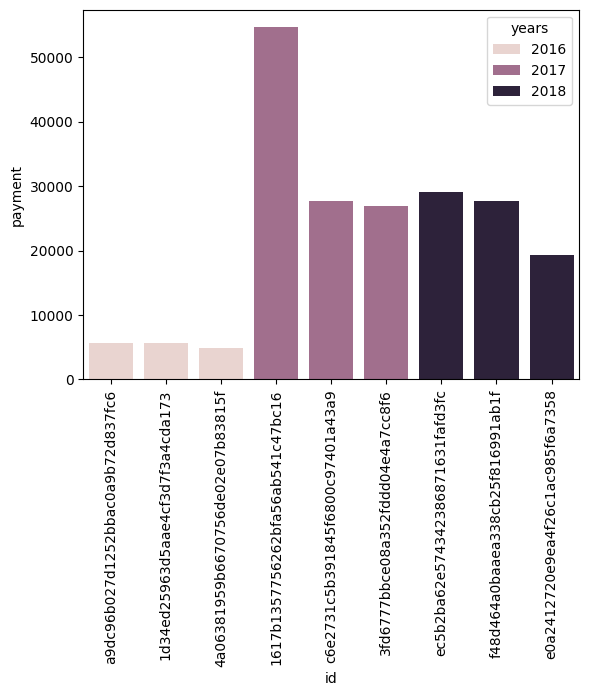

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

query = """select years, customer_id, payment, d_rank
from
(select year(orders.order_purchase_timestamp) years,
orders.customer_id,
sum(payments.payment_value) payment,
dense_rank() over(partition by year(orders.order_purchase_timestamp)
order by sum(payments.payment_value) desc) d_rank
from orders join payments 
on payments.order_id = orders.order_id
group by year(orders.order_purchase_timestamp),
orders.customer_id) as a
where d_rank <= 3 ;"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["years","id","payment","rank"])
sns.barplot(x = "id", y = "payment", data = df, hue = "years")
plt.xticks(rotation = 90)
plt.show();